5350 Thesis in Economics

Andres Cruz 25199 & Klara Holmer 25037 

Code for Grundskola + Gymnasieskola

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1 - Importing ExcelFiles and Concatenating DataFrames

# --- Gymnasieskola --- 

# Defining the full path to the Excel file in the new folder
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/gymnasieskola.xlsx'

# Read all sheets at once into a dictionary
sheets = ['Engelska', 'Matematik', 'Svenska']
gymnasieskola_data = pd.read_excel(pathname, sheet_name=sheets)

# Unpack the dictionary into separate variables if needed
gymnasieskola_engelska = gymnasieskola_data['Engelska']
gymnasieskola_matematik = gymnasieskola_data['Matematik']
gymnasieskola_svenska = gymnasieskola_data['Svenska']

# --- Grundskola --- 

# Defining the full path to the Excel file in the new folder
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/grundskola.xlsx'

# Read all sheets at once into a dictionary
sheets = ['Engelska', 'Matematik', 'Svenska']
grundskola_data = pd.read_excel(pathname sheet_name=sheets)

# Unpack the dictionary into separate variables if needed
grundskola_engelska = grundskola_data['Engelska']
grundskola_matematik = grundskola_data['Matematik']
grundskola_svenska = grundskola_data['Svenska']

# --- Concatenating --- 

# Engelska
school_data_engelska = pd.concat([gymnasieskola_engelska, grundskola_engelska], ignore_index=True)

# Matematik
school_data_matematik = pd.concat([gymnasieskola_matematik, grundskola_matematik], ignore_index=True)

# Svenska
school_data_svenska = pd.concat([gymnasieskola_svenska, grundskola_svenska], ignore_index=True)

# Defining the full path where the Excel file will be saved
pathname = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/grundskola.xlsx'

# Exporting all the tables created into one Excel File 
with pd.ExcelWriter('school_data.xlsx') as writer:
    school_data_engelska.to_excel(writer, sheet_name = 'Engelska', index=False)
    school_data_matematik.to_excel(writer, sheet_name = 'Matematik', index=False)
    school_data_svenska.to_excel(writer, sheet_name = 'Svenska', index=False)

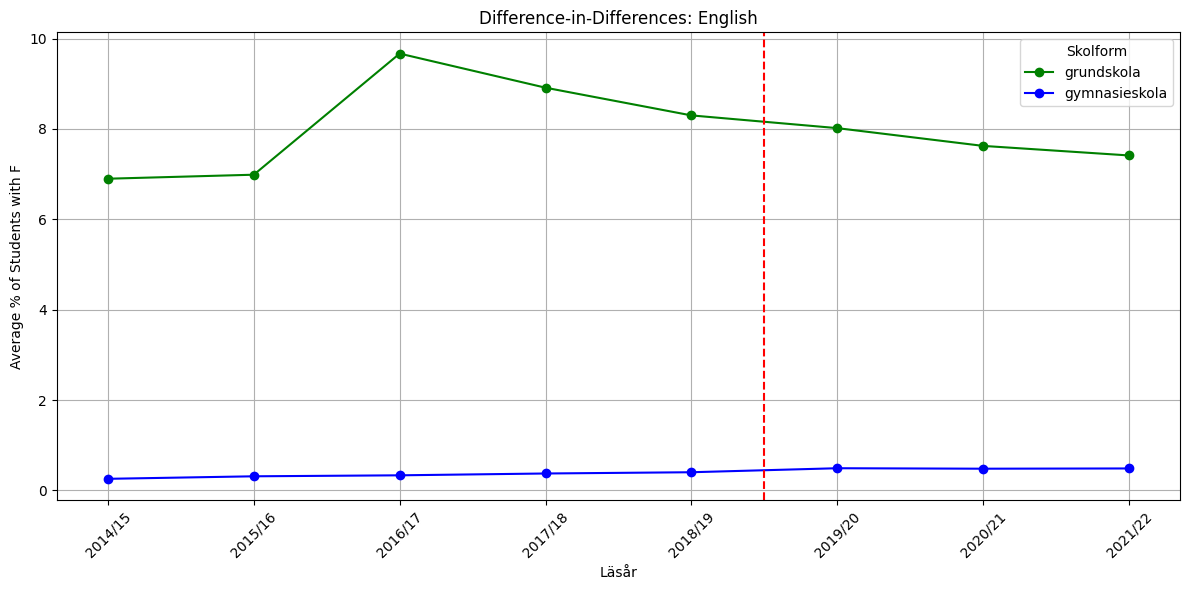

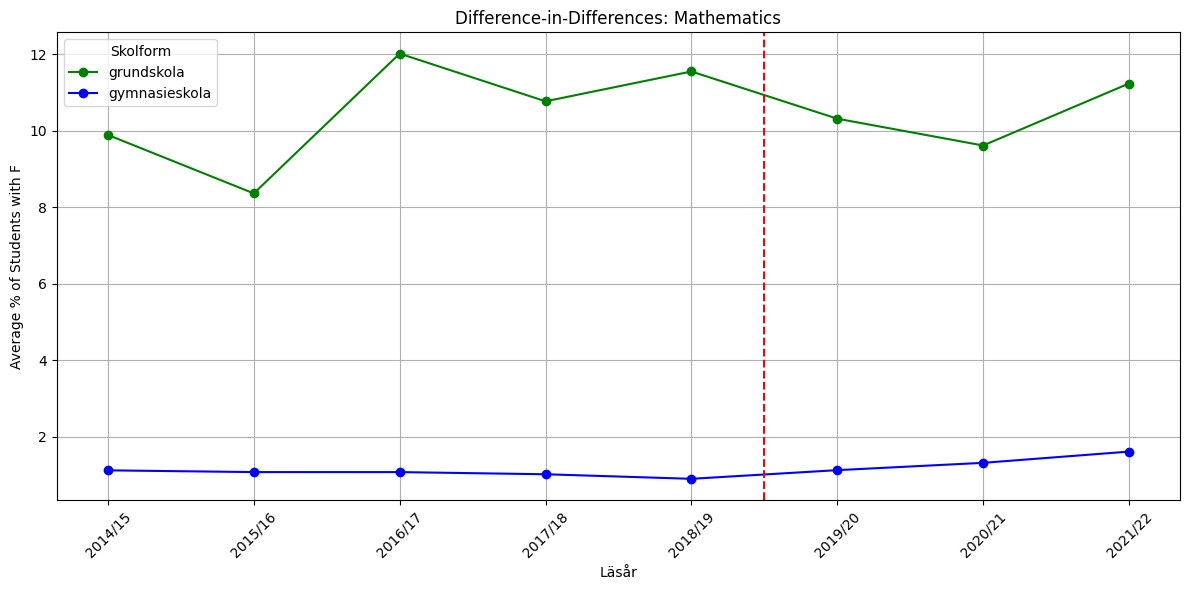

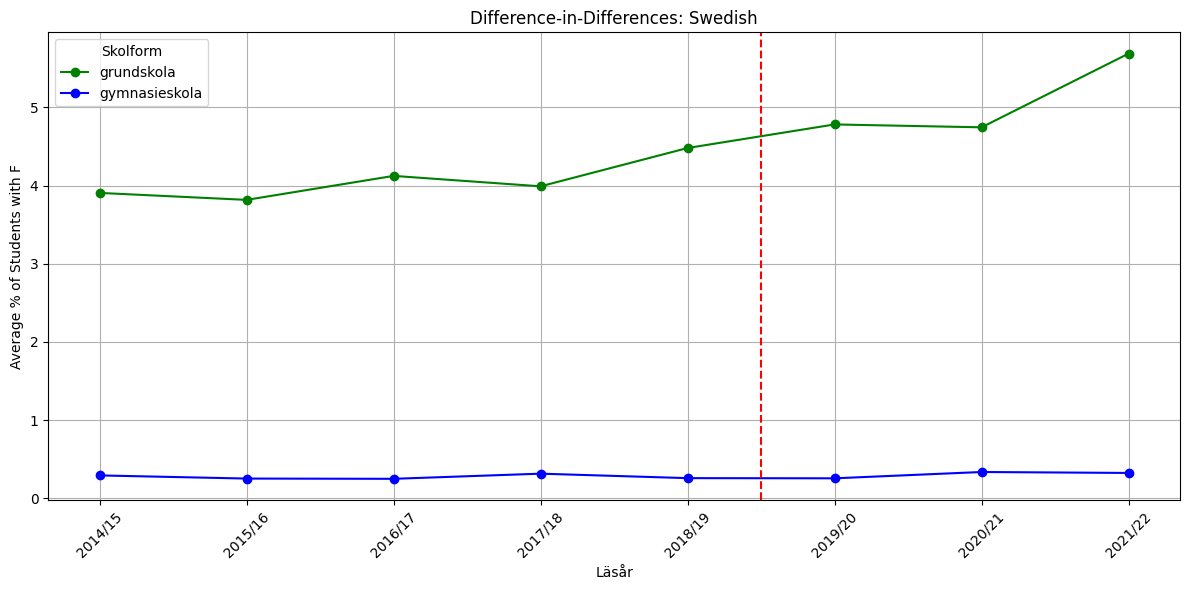

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot_did(data, variable, title, treatment_year=19.5):
    """
    Processes the dataset, ensuring all years are represented, and generates a Difference-in-Differences plot.
    
    Parameters:
    - data: Pandas DataFrame containing the data. It must include a 'läsår' column with string values in the format 'yyyy/yy'.
    - variable: Column name for the dependent variable to be plotted.
    - title: Title for the plot.
    - treatment_year: The numeric part (yy) of the läsår when the treatment/intervention occurred.
    """
    
    # Create a numeric version of 'läsår' using the yy part
    data['year_numeric'] = data['läsår'].apply(lambda x: int(x.split('/')[1]))
    
    # Aggregate data by year_numeric, läsår, and school type (skolform)
    grouped_df = data.groupby(['year_numeric', 'läsår', 'skolform'], as_index=False)[variable].mean()
    
    # Create a full range of numeric years for continuity in the plot
    all_years = pd.DataFrame({
        'year_numeric': range(grouped_df['year_numeric'].min(), grouped_df['year_numeric'].max() + 1)
    })
    
    # Create a mapping from numeric year to läsår using available data
    mapping = dict(zip(grouped_df['year_numeric'], grouped_df['läsår']))
    
    # Generate the plot
    plt.figure(figsize=(12, 6))
    
    for skolform, subset in grouped_df.groupby('skolform'):
        # Merge with all_years to fill in any missing years
        subset = all_years.merge(subset, on='year_numeric', how='left')
        subset['skolform'] = skolform  # preserve skolform
        
        # Assign colors: blue for gymnasieskola, green for grundskola
        if skolform.lower() == 'gymnasieskola':
            color = 'blue'
        elif skolform.lower() == 'grundskola':
            color = 'green'
        else:
            color = None  # default color for any other skolform
        
        # Plot using the numeric year for the x-axis
        plt.plot(subset['year_numeric'], subset[variable], marker='o', linestyle='-', label=skolform, color=color)
    
    # Add a vertical line indicating the treatment year
    plt.axvline(x=treatment_year, color='red', linestyle='--')
    
    # Set custom x-ticks: use the numeric years but label them with the läsår format.
    xticks = all_years['year_numeric']
    xlabels = [mapping.get(x, f"{2000 + x - 1}/{x:02d}") for x in xticks]
    plt.xticks(xticks, xlabels, rotation=45)
    
    # Configure the plot
    plt.title(f'Difference-in-Differences: {title}')
    plt.xlabel('Läsår')
    plt.ylabel('Average % of Students with F')
    plt.legend(title='Skolform')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply the function to the provided dataframes
process_and_plot_did(school_data_engelska, 'andel_elever_F_eng', 'English')
process_and_plot_did(school_data_matematik, 'andel_elever_F_ma', 'Mathematics')
process_and_plot_did(school_data_svenska, 'andel_elever_F_sv', 'Swedish')

Svenska som andra språk!!!!!!!!!!!!!!!!!!!!!!!!